In [1]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
imagesize = 224
channels = 3

train_data = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=10


)

train_generator = train_data.flow_from_directory(
    'Attendence_system/train',
    target_size = (imagesize,imagesize),
    batch_size=16,
    class_mode = 'sparse',


)



Found 1100 images belonging to 10 classes.


In [4]:
test_data = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=10


)

test_generator = test_data.flow_from_directory(
    'Attendence_system/test',
    target_size = (imagesize,imagesize),
    batch_size=16,
    class_mode = 'sparse',


)



Found 141 images belonging to 10 classes.


In [14]:
val_data = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    rotation_range=10


)

val_generator = val_data.flow_from_directory(
    'Attendence_system/val',
    target_size = (imagesize,imagesize),
    batch_size=16,
    class_mode = 'sparse',


)



Found 135 images belonging to 10 classes.


In [6]:
print(train_generator.class_indices)

{'DendupGhishing': 0, 'KarmaYangzom': 1, 'KushalChhetri': 2, 'NarBdr': 3, 'NgawangChoden': 4, 'PemaZangmo': 5, 'PhuntshoDorji': 6, 'SamtenWangmo': 7, 'SonamDendup': 8, 'noface': 9}


In [7]:
class_name = list(train_generator.class_indices.keys())

In [10]:
class_name

['DendupGhishing',
 'KarmaYangzom',
 'KushalChhetri',
 'NarBdr',
 'NgawangChoden',
 'PemaZangmo',
 'PhuntshoDorji',
 'SamtenWangmo',
 'SonamDendup',
 'noface']

In [11]:
input_shape = (imagesize, imagesize, channels)
n_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape = input_shape),
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64 , activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'), # activation  softmax is normalize the activation of the classes
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [13]:
model.compile(
    optimizer = 'adam',  # adam is a famouse optimizer in deep learning
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
    metrics = ['accuracy']
    )

In [16]:
history = model.fit( # records every history of epochs
    train_generator,
    steps_per_epoch=69,
    batch_size = 16,
    validation_data = val_generator,
    validation_steps=8,
    verbose = 1,
    epochs = 10,
    
) # training 

Epoch 1/10
69/69 [==============================] - 58s 835ms/step - loss: 1.9691 - accuracy: 0.2900 - val_loss: 1.1912 - val_accuracy: 0.6250
Epoch 2/10
69/69 [==============================] - 57s 820ms/step - loss: 0.9578 - accuracy: 0.6545 - val_loss: 0.6365 - val_accuracy: 0.8125
Epoch 3/10
69/69 [==============================] - 56s 811ms/step - loss: 0.5559 - accuracy: 0.8000 - val_loss: 0.4293 - val_accuracy: 0.8516
Epoch 4/10
69/69 [==============================] - 56s 813ms/step - loss: 0.3156 - accuracy: 0.8891 - val_loss: 0.1900 - val_accuracy: 0.9219
Epoch 5/10
69/69 [==============================] - 56s 812ms/step - loss: 0.2171 - accuracy: 0.9245 - val_loss: 0.0862 - val_accuracy: 0.9609
Epoch 6/10
69/69 [==============================] - 56s 815ms/step - loss: 0.1555 - accuracy: 0.9436 - val_loss: 0.1210 - val_accuracy: 0.9531
Epoch 7/10
69/69 [==============================] - 57s 825ms/step - loss: 0.1054 - accuracy: 0.9645 - val_loss: 0.1365 - val_accuracy: 0.9531

In [17]:
model.evaluate(test_generator)

9/9 [==============================] - 2s 212ms/step - loss: 0.0363 - accuracy: 0.9929


[0.036283913999795914, 0.9929078221321106]

In [18]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, ' Training  and Validation Accuracy')

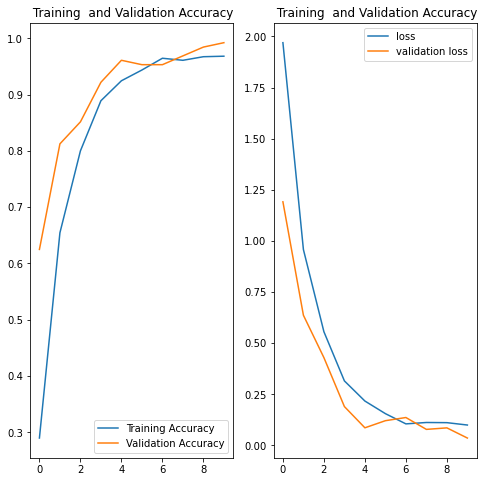

In [20]:
epochs = 10
plt.figure(figsize = (8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(epochs), acc , label ='Training Accuracy')
plt.plot(range(epochs), val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')
plt.title(' Training  and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(epochs), loss , label ='loss')
plt.plot(range(epochs), val_loss, label = 'validation loss')
plt.legend(loc = 'upper right')
plt.title(' Training  and Validation Accuracy')

first image to predict
actual label: KushalChhetri
predicted label: KushalChhetri


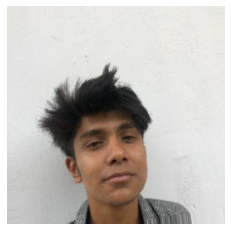

In [23]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_name[np.argmax(batch_prediction[0])])
    plt.axis('off')
    
    break

In [27]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

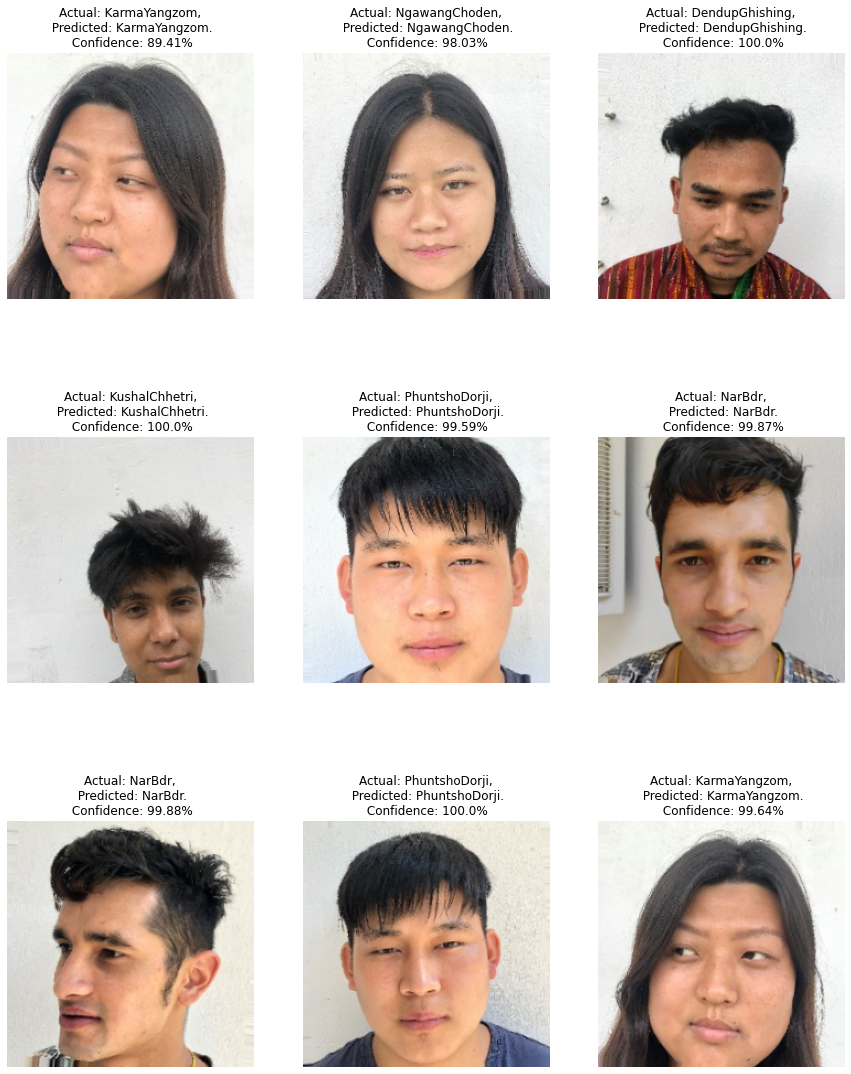

In [31]:
plt.figure(figsize=(15, 20))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [39]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report


[INFO] evaluating the model...
                precision    recall  f1-score   support

DendupGhishing       0.11      0.11      0.11        18
  KarmaYangzom       0.11      0.11      0.11        18
 KushalChhetri       0.00      0.00      0.00        18
        NarBdr       0.17      0.17      0.17        18
 NgawangChoden       0.17      0.17      0.17        18
    PemaZangmo       0.18      0.20      0.19        10
 PhuntshoDorji       0.00      0.00      0.00        10
  SamtenWangmo       0.00      0.00      0.00        10
   SonamDendup       0.00      0.00      0.00        10
        noface       0.09      0.09      0.09        11

      accuracy                           0.09       141
     macro avg       0.08      0.08      0.08       141
  weighted avg       0.09      0.09      0.09       141



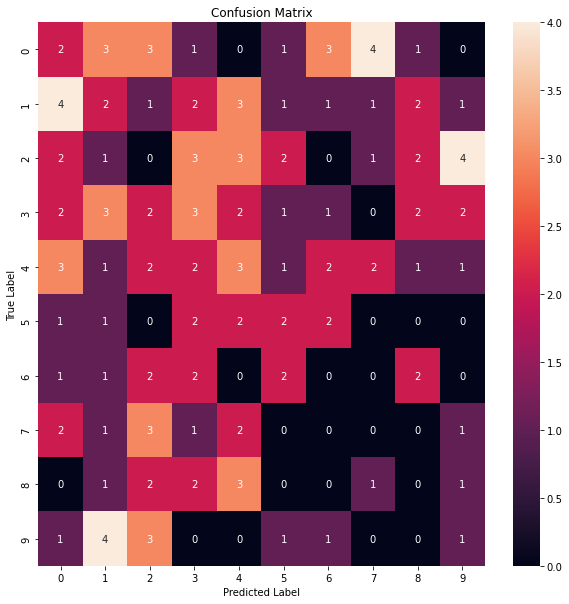

In [53]:
print("[INFO] evaluating the model...")
test_generator.reset()
plt.figure(figsize=(10,10))
predIdxs = model.predict(test_generator, steps = len(test_generator))
predIdxs = np.argmax(predIdxs, axis=1)
matrix = confusion_matrix(test_generator.classes, predIdxs)
sns.heatmap(matrix, annot=True, cbar=True, fmt='d')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')

print(classification_report(test_generator.classes, predIdxs, target_names=test_generator.class_indices.keys()))

In [55]:
model.save('sas.h5')